<a href="https://colab.research.google.com/github/AzanHaider11/MNIST-dataset-CNN-/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRAINING A SIMPLE NEURAL NETWORK**




"MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike."

[Read more.](https://www.kaggle.com/c/digit-recognizer)


<a title="By Josef Steppan [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:MnistExamples.png"><img width="512" alt="MnistExamples" src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png"/></a>

**Step 1 — Knowing The Dataset**

The most crucial task as a Data Scientist is to gather the perfect dataset and to understand it thoroughly. Trust me, the rest is a lot easier. For this project, we will be using the popular [MNIST database](https://en.wikipedia.org/wiki/MNIST_database) database. It is a collection of 70000 handwritten digits split into training and test set of 60000 and 10000 images respectively.

The data set is originally available on [Yann Lecun’s website](http://yann.lecun.com/exdb/mnist/). Cleaning the data is one of the biggest tasks. Don’t forget — **“Garbage in, garbage out !”**. Luckily, for us PyTorch provides an easy implementation to download the cleaned and already prepared data, using a few lines of code. Before starting, we need to make all the necessary installation and imports of the relevant packages.

In [ ]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import Libraries
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

Before downloading the data, let us define what are the transformations we want to perform on our data before feeding it into the pipeline. In other words, you can consider it to be some kind of custom edit to are performing to the images so that all the images have the same dimensions and properties. We do it using **torchvision.transforms**.

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

1. **transforms.ToTensor()** — converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor.


2. **transforms.Normalize()** — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.


Now we finally download the data sets, shuffle them and transform each of them. We download the data sets and load them to DataLoader, which combines the data-set and a sampler and provides single- or multi-process iterators over the data-set.

In [ ]:
trainset = datasets.MNIST('train', download=True, train=True, transform=transform)
valset = datasets.MNIST('val', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting train/MNIST/raw/train-images-idx3-ubyte.gz to train/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting train/MNIST/raw/train-labels-idx1-ubyte.gz to train/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting train/MNIST/raw/t10k-images-idx3-ubyte.gz to train/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting train/MNIST/raw/t10k-labels-idx1-ubyte.gz to train/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting val/MNIST/raw/train-images-idx3-ubyte.gz to val/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting val/MNIST/raw/train-labels-idx1-ubyte.gz to val/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting val/MNIST/raw/t10k-images-idx3-ubyte.gz to val/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting val/MNIST/raw/t10k-labels-idx1-ubyte.gz to val/MNIST/raw



In one line, batch size is the number of images we want to read in one go.

**Step 2 — Knowing The Dataset Better**

In this phase, we will be doing some exploratory data analysis on our images and tensors. Let us check out the shape of the images and the labels.

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


The shape of images as you’ll find out is, `torch.Size([64,1,28,28])`, which suggests that there are 64 images in each batch and each image has a dimension of `28 x 28` pixels. Similarly, the labels have a shape as `torch.Size([64])`. Guess why? — Yes, you’re right! 64 images should have 64 labels respectively. That’s it. Easy!

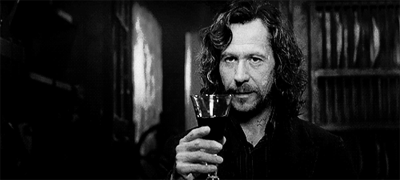


Let’s display one image from the training set, for example, the first one.

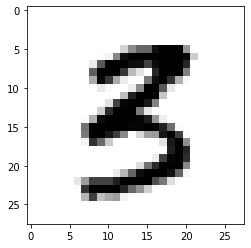

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

Cool right! Let’s display some more images, this will give us a feel of how the dataset looks like.

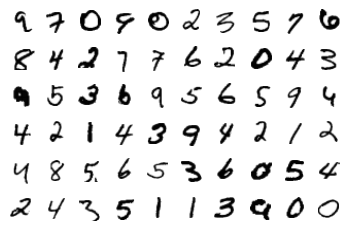

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

This will generate a grid of images in a random order. Now, it is time to get started by defining the neural network we will be using.

**Step 3 — Build The Neural Network**

We will be building the following network, as you can see it contains an input layer (the first layer), an output layer of ten neurons (or units, the circles) and two hidden layers in between.


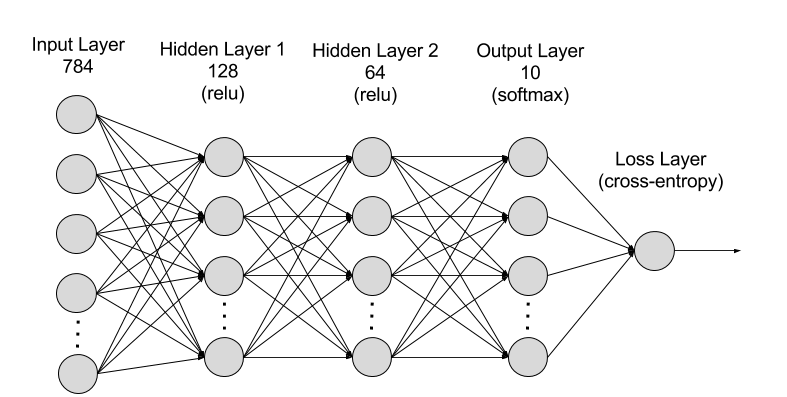

PyTorch’s `torch.nn` module allows us to build the above network very simply. It is extremely easy to understand as well. Look at the code below.

In [ ]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


The `nn.Sequential` wraps the layers in the network. There are **three linear** layers with **ReLU activation** ( a simple function which allows positive values to pass through, whereas negative values are modified to zero ). The output layer is a linear layer with **LogSoftmax activation** because this is a classification problem.

Technically, a LogSoftmax function is the logarithm of a Softmax function as the name says and it looks like this, as shown below.

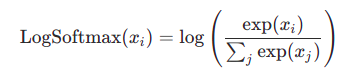


Next, we define the **negative log-likelihood** loss. It is useful to train a classification problem with C classes. Together the **LogSoftmax()** and **NLLLoss()** acts as the cross-entropy loss as shown in the network architecture diagram above.

Also, you must be wondering why do we have 784 units in the first layer. Good! It is because we flatten out each image before sending it inside the neural network. (28 x 28 = 784)



In [ ]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

**Step 4 — Adjusting Weights**

A neural network learns by iterating multiple times over the available data. The terms learn refers to the adjustment of weights of the network to minimize the loss. Let’s visualize how it works.

In [ ]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        [ 0.0034,  0.0034,  0.0034,  ...,  0.0034,  0.0034,  0.0034],
        [ 0.0016,  0.0016,  0.0016,  ...,  0.0016,  0.0016,  0.0016],
        ...,
        [-0.0024, -0.0024, -0.0024,  ..., -0.0024, -0.0024, -0.0024],
        [ 0.0028,  0.0028,  0.0028,  ...,  0.0028,  0.0028,  0.0028],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015]])


Before the backward pass, the model weights are set to default none values. Once, we call the backward() function the weights are updated.

**Step 5 — Core Training Process**

This is where the actual magic happens. Your neural network iterates over the training set and updates the weights. We make use of torch.optim which is a module provided by PyTorch to optimize the model, perform gradient descent and update the weights by back-propagation. Thus in each epoch (number of times we iterate over the training set), we will be seeing a gradual decrease in training loss.

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6430067712627748
Epoch 1 - Training loss: 0.28222038827216955
Epoch 2 - Training loss: 0.2217934547242389
Epoch 3 - Training loss: 0.17628038075687028
Epoch 4 - Training loss: 0.14739355466453663
Epoch 5 - Training loss: 0.12520107478578527
Epoch 6 - Training loss: 0.10930244529496695
Epoch 7 - Training loss: 0.09757408125997225
Epoch 8 - Training loss: 0.09041460837795535
Epoch 9 - Training loss: 0.07983119811352367
Epoch 10 - Training loss: 0.07201246140318225
Epoch 11 - Training loss: 0.06656013730901486
Epoch 12 - Training loss: 0.062030896988770824
Epoch 13 - Training loss: 0.057362001563515716
Epoch 14 - Training loss: 0.05194452637359738

Training Time (in minutes) = 3.5154170473416646


**Step 6 — Testing & Evaluation**

We are nearly done with our work. The model is ready, but we have to evaluate it first. I created a utility function view_classify() to show the image and class probabilities that were predicted. The code is available on GitHub. (Link in the references section below).

I passed an image to the trained model from the validation set that we created earlier, to see how the model works.

In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 1


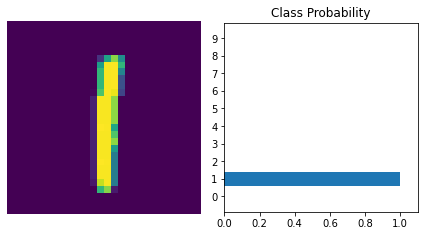

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

Now we iterate through the validation set using a for loop and calculate the total number of correct predictions. This is how we can calculate the accuracy.

Let’s see the result now. This is the most interesting part!

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9746


Wow! We got over 97.4% accuracy. That’s something to celebrate. The reason we got such a high accuracy was that our data-set was clean, had a variety of well-shuffled images and a large number of them. This made our model well prepared to recognize a large number of unseen digits.

**Step 7 — Saving The Model**

Now that we are done with everything, we do not want to lose the trained model. We don’t want to train it every time we use it. For this purpose, we will be saving the model. When we need it in the future, we can load it and use it directly without further training.

In [ ]:
torch.save(model, './my_mnist_model.pt') 

**Conclusion**

I hope that you enjoyed the process of building a neural network, training it, testing it and finally saving it